In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error
from math import sqrt

In [141]:
df = pd.read_csv('development.csv',skipinitialspace=True)
test_set_df = pd.read_csv('evaluation.csv',skipinitialspace=True)

In [142]:
df.isna().sum()

id                                   0
name                                13
host_id                              0
host_name                           19
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       8041
reviews_per_month                 8041
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [143]:
test_set_df.isna().sum()

id                                   0
host_id                              0
host_name                           31
neighbourhood                     3415
neighbourhood_group_cleansed      9987
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
availability_365                     0
number_of_reviews                    0
calculated_host_listings_count       0
reviews_per_month                 1275
last_review                       1275
dtype: int64

In [144]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
mask=( (df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)) )
outliers=df[mask]
outliers

id                                               name    host_id  \
62     19227532  Amazing Harlem Apartment on 5th Avenue \n3 bed...  134601877   
63     20308927  Huge Brownstone duplex w/garden, Park Slope, B...   24945340   
87      9772486                              Williamsburg 2000sqft   50385630   
93      7762374          Artsy townhouse in Sugar Hill (Manhattan)    1273607   
94     20191868       3 BR - Great Midtown location off 5th Avenue   26490904   
...         ...                                                ...        ...   
39005  23277230                  2 bedrooms flat near Central Park  128579948   
39008  35025851     HUGE & COZY 3 BEDROOMS IN HEART OF MANHATTAN!!  226119185   
39021  35933956              2BR Getaway in Modern Luxury Building  268630107   
39076   3010664   Giant 3 story family house,  15 min to Manhattan    5663597   
39109  35204821    Spacious for big family or groups. Well located  127805063   

             host_name neighbourhood_group     neighbourhood  latitude  \
62              Steven           Manhattan       East Harlem  40.79929   
63              Oliver            Brooklyn        Park Slope  40.67447   
87             Bradley            Brooklyn      Williamsburg  40.71712   
93               David           Manhattan            Harlem  40.82651   
94                 Deo           Manhattan           Midtown  40.76255   
...                ...                 ...               ...       ...   
39005        Giampiero           Manhattan   Upper East Side  40.76646   
39008              Jay           Manhattan    Hell's Kitchen  40.76796   
39021  Justice & Ellie           Manhattan      East Village  40.72060   
39076             Amir            Brooklyn  Prospect Heights  40.67553   
39109           Monika           Manhattan           Midtown  40.75803   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
62     -73.94605  Entire home/apt    350               3                 81   
63     -73.97605  Entire home/apt    400               2                  7   
87     -73.94671     Private room    477               2                  1   
93     -73.94871  Entire home/apt    450               3                 35   
94     -73.97453  Entire home/apt    350              30                  2   
...          ...              ...    ...             ...                ...   
39005  -73.96760  Entire home/apt    500               3                 56   
39008  -73.98891  Entire home/apt    599               3                  6   
39021  -73.97913  Entire home/apt    375               3                  0   
39076  -73.96376  Entire home/apt    350               3                 11   
39109  -73.96224  Entire home/apt    350              30                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
62      6/29/2019               3.46                               2   
63       1/1/2019               0.37                               1   
87     10/10/2016               0.03                               1   
93      6/28/2019               0.77                               1   
94      11/1/2018               0.21                               4   
...           ...                ...                             ...   
39005   6/27/2019               3.57                               2   
39008    7/3/2019               4.74                               1   
39021         NaN                NaN                               1   
39076   4/28/2019               0.19                               1   
39109         NaN                NaN                               2   

       availability_365  
62                   27  
63                   14  
87                  358  
93                  264  
94                  332  
...                 ...  
39005               163  
39008               199  
39021               357  
39076                21  
39109               283  

[2349 rows x 16 columns]

In [145]:
df.drop(outliers.index,inplace=True)

In [146]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
test_set_df['reviews_per_month'] = test_set_df['reviews_per_month'].fillna(0)
drop_columns = ['latitude','longitude','id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'price','last_review']
drop_columns_evaluation = ['latitude','longitude','id', 'host_id', 'host_name', 'neighbourhood',
       'neighbourhood_group_cleansed',  'last_review']
X = df.drop(drop_columns, axis=1)
test_set=test_set_df.drop(drop_columns_evaluation,axis=1)
y = df['price']

In [147]:
ss = StandardScaler()
le = LabelEncoder()
# Transform all categorical columns in Dependant Varaible X
for i in X.columns:
    if X[i].dtype not in ['int64','float64'] :
        le.fit(X[i].append(test_set[i]))
        X[[i]]=le.transform(X[[i]])
        test_set[[i]] = le.transform(test_set[[i]])
    else:
        X[[i]]=ss.fit_transform(X[[i]])
        test_set[[i]] = ss.fit_transform(test_set[[i]])

X = X.values
test_set = test_set.values
y = y.values.reshape(-1,1)

In [148]:
X.shape,y.shape,test_set.shape

((36767, 6), (36767, 1), (9987, 6))

In [149]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=40)

In [150]:
# Fit and evaluate linear Model
lr = LinearRegression()
lr.fit(X_train, y_train)

train_pred= lr.predict(X_train)

print("X_train")
print("RMSE:",np.sqrt(mean_squared_error(y_train,train_pred)))
print("r2 score:",r2_score(y_train, train_pred))

test_pred= lr.predict(X_test)
print("X_test")
print("RMSE:",np.sqrt(mean_squared_error(y_test,test_pred)))
print("r2 score:",r2_score(y_test, test_pred))

X_train
RMSE: 53.09433299045722
r2 score: 0.4019065035591147
X_test
RMSE: 52.844063803963515
r2 score: 0.3957917436130044


In [151]:
evaluate_pred_final= lr.predict(test_set)
evaluate_pred_final=np.squeeze(evaluate_pred_final)
pd.DataFrame({'id': test_set_df.id, 'price': evaluate_pred_final}).to_csv('submission0.csv', index=False)

In [152]:
# Fit best polynomial Linear model
best_poly_reg = PolynomialFeatures(degree=2)
X_poly = best_poly_reg.fit_transform(X_train)
best_pol_reg = LinearRegression()
best_pol_reg.fit(X_poly, y_train)

train_pred= best_pol_reg.predict(X_poly)
print("X_train")
print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred)))
print("R2 score :",r2_score(y_train, train_pred))

X_test_poly= best_poly_reg.transform(X_test)
test_pred= best_pol_reg.predict(X_test_poly)
print("X_test")
print("RMSE:",np.sqrt(mean_squared_error(y_test,test_pred)))
print("r2 score:",r2_score(y_test, test_pred))

X_train
RMSE : 52.59500254243814
R2 score : 0.41310325295885686
X_test
RMSE: 52.4789330687462
r2 score: 0.40411255808499236


In [153]:
# Compute results for polynomial regression
X_evaluate_poly= best_poly_reg.transform(test_set)
evaluate_pred_final= best_pol_reg.predict(X_evaluate_poly)
evaluate_pred_final=np.squeeze(evaluate_pred_final)
pd.DataFrame({'id': test_set_df.id, 'price': evaluate_pred_final}).to_csv('submission1.csv', index=False)

In [154]:
# Fit and test ridge regression
rr =Ridge()
rr.fit(X_train, y_train)

train_pred= rr.predict(X_train)

print("RMSE:",np.sqrt(mean_squared_error(y_train,train_pred)))
print("r2 score:",r2_score(y_train, train_pred))

test_pred= rr.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,test_pred)))
print("r2 score:",r2_score(y_test, test_pred))

RMSE: 53.09433300870764
r2 score: 0.4019065031479424
RMSE: 52.84402612771735
r2 score: 0.3957926051777385


In [155]:
evaluate_pred_final= rr.predict(test_set)
evaluate_pred_final=np.squeeze(evaluate_pred_final)
pd.DataFrame({'id': test_set_df.id, 'price': evaluate_pred_final}).to_csv('submission2.csv', index=False)

In [156]:
# Fit and test Lasso Regression
lr = Lasso()
lr.fit(X_train,y_train)

train_pred= lr.predict(X_train)
print("RMSE:",np.sqrt(mean_squared_error(y_train,train_pred)))
print("r2 score:",r2_score(y_train, train_pred))

test_pred= lr.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,test_pred)))
print("r2 score:",r2_score(y_test, test_pred))

RMSE: 53.15630902252889
r2 score: 0.4005094016949705
RMSE: 52.7975776871179
r2 score: 0.39685430162242974


In [157]:
evaluate_pred_final= lr.predict(test_set)
pd.DataFrame({'id': test_set_df.id, 'price': evaluate_pred_final}).to_csv('submission3.csv', index=False)

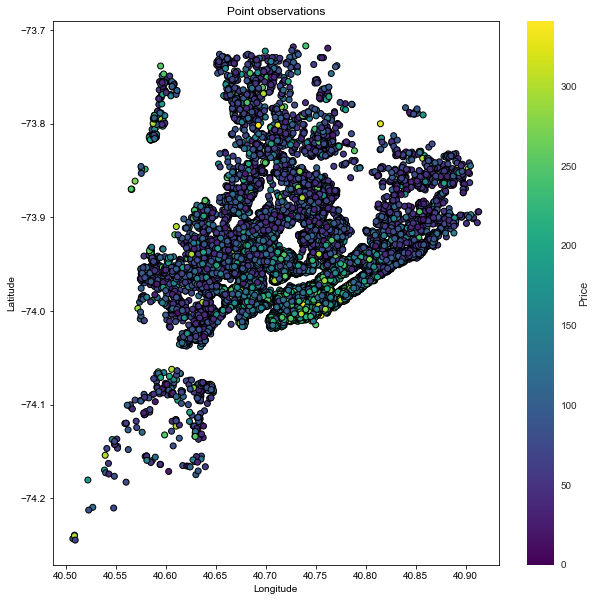

In [158]:
plt.figure(figsize=(10,10))
plt.scatter(df['latitude'], df['longitude'], c=df['price'],edgecolor='k')
plt.title("Point observations")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.style.use('seaborn')
cbar= plt.colorbar()
cbar.set_label("Price", labelpad=+1)
plt.show()

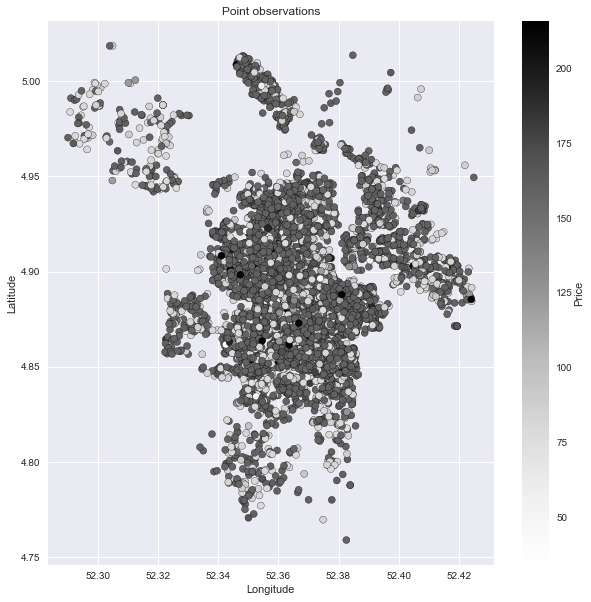

In [159]:
plt.figure(figsize=(10,10))
plt.scatter(test_set_df['latitude'], test_set_df['longitude'], c=evaluate_pred_final,edgecolor='k')
plt.title("Point observations")
plt.xlabel("latitude")
plt.ylabel("Longitude")
plt.style.use('seaborn')
cbar= plt.colorbar()
cbar.set_label("Price", labelpad=+1)
plt.show()